(complex)=
# Complex numbers

```{image} ../images/chapter04.svg
:width: 75%
:align: center
:alt: a point in the complex plane
```

This section covers the fundamentals of complex numbers, and should help give a sense of how and why they're useful for modeling periodic phenomena such as audio signals.

In [1]:
%run ../setup.ipynb

**Why use complex numbers?**

Complex numbers were originally developed to solve polynomial equations (e.g., find $x$ such that $x^2 + x + 1 = 0$), and it's true that many of the things we do in signal processing involve exactly these kinds of equations.
However, this isn't a terribly satisfying motivation for using complex numbers to study signal processing, and this is the point at which many students start to get confused about why we need all of this math.

There is, however, a much deeper reason why complex numbers arise in signal processing, and it has to do with the link between arithmetic and geometry.

Think about what happens when you multiply one real number $x$ by another $y$.
If $y > 1$, then $x\cdot y$ becomes bigger than $x$, which you can think of as *stretching* the number line.
If $y < 1$, then $x \cdot y$ becomes smaller, which embodies the opposite effect, *compressing* the number line.
And if $y < 0$, then the sign of $x\cdot y$ flips from $x$'s (positive becomes negative, and vice versa), which you can think of as *mirroring* the number line horizontally.
Stretching, compressing, and reflecting are all familiar **geometric** operations that happen to correspond to the arithmetic of real numbers.

<Figure size 576x144 with 1 Axes>

<Figure size 576x144 with 1 Axes>

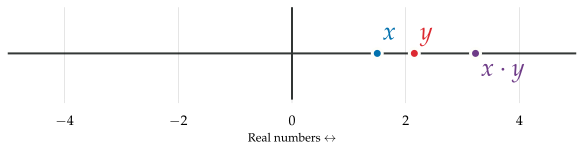

In [6]:
#%%capture
# Plot number line operations here
#  magnitude oscillating 1 + 0.5 * cos
fig, ax = plt.subplots(figsize=figaspect(1./4))

duration = 20
frame_rate = 25
#frame_rate = 4
n_frames = duration * frame_rate

x = 1.5
y = 0.25 + 2 * np.sin(2 * np.pi * 3 * np.linspace(0, 1, num=n_frames, endpoint=False))

xy = x * y

xp = ax.scatter(x, 0, color=colors[0], label=r'$x$', s=100, linewidth=3, edgecolor='#fefefa')
xt = ax.text(x + .1,  .15, r'$x$', color=colors[0], size=25)

yp = ax.scatter(y[0], 0, color=colors[1], label=r'$y$', s=100, linewidth=3, edgecolor='#fefefa')
yt = ax.text(y[0] + .1,  .15, r'$y$', color=colors[1], size=25)

xyp = ax.scatter(xy[0], 0, color=colors[4], label=r'$x\cdot y$', s=100, linewidth=3, edgecolor='#fefefa')
xyt = ax.text(xy[0] + .1, -0.05, r'$x \cdot y$', color=colors[4], size=25, va='top')

ax.axhline(0, color=colors[3], zorder=-1, linewidth=2)
ax.axvline(0, color=colors[3], zorder=-1, linewidth=2)
#ax.axis('off')
ax.set_yticks([])
ax.set_xlim(-5, 5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel(r'Real numbers $\leftrightarrow$')

def init():
    return yp, xyp, yt, xyt

def animate(frame):
    
    yp.set_offsets(np.c_[y[frame], 0])
    xyp.set_offsets(np.c_[xy[frame], 0])

    yt.set_x(y[frame] + 0.1)
    xyt.set_x(xy[frame] + 0.1)
    return yp, xyp, yt, xyt

animate(50)

#animation = FuncAnimation(fig, animate, init_func=init,
#                               frames=np.arange(n_frames),
#                               interval=1000/frame_rate, blit=True);
#glue('line', animation, display=False)
glue('line', fig, display=False)

```{glue:figure} line
Multiplication on the real number line acts like stretching, compressing, or reflecting across the 0 point.
```

But what if the numbers are complex instead of real?  It turns out that you still get the same basic types of operations (stretching, compressing, and reflecting), but now in *two* dimensions instead of 1.
But there's an additional **twist**: complex multiplication also **rotates** points in the plane.
Rotation is a one of the simplest models of periodicity, just ask any clock-maker.

```{tip}
**Rotation** models **repetition**.

**Complex multiplication** models **rotation**.
```